In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # pwd
# os.chdir('..')
# all_df = pd.read_csv('/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/data/all_data.csv')

cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [3]:
# check the data for NaN values or other errors
all_df = pd.read_csv(f"{root_directory}/data/all_data.csv")
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002234 entries, 0 to 2002233
Data columns (total 39 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   area_percent    float64
 2   update_time     float64
 3   delta_time      float64
 4   plan_length     int64  
 5   replan_count    int64  
 6   logging_time    float64
 7   frame_count     int64  
 8   known_area      int64  
 9   success         bool   
 10  seed            int64  
 11  draw_sim        bool   
 12  log_plots       bool   
 13  use_threads     bool   
 14  n_bots          int64  
 15  grid_thickness  int64  
 16  screen_width    int64  
 17  screen_height   int64  
 18  min_room_size   int64  
 19  max_room_size   int64  
 20  wall_ratio      float64
 21  method          object 
 22  start_scenario  object 
 23  goal_scenario   object 
 24  experiment_ID   int64  
 25  loss_type       object 
 26  execution_date  object 
 27  epsilon_0       float64
 28  epsilon_1   

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
all_df['method'].unique()

array(['Decision_Frontier_Closest', 'Voronoi_Frontier_Help_Random',
       'Voronoi_Frontier_Closest', 'Voronoi_Frontier_Help_Closest',
       'Unknown_Closest', 'Frontier_Random',
       'Decay_Epsilon_Greedy_Frontier', 'Unknown_Random',
       'Frontier_Closest', 'Voronoi_Frontier_Random',
       'Decay_Epsilon_Greedy_Unknown', 'Epsilon_Greedy_Frontier',
       'GameTheory', 'Epsilon_Greedy_Unknown'], dtype=object)

In [6]:
# list all col with Nan
all_df.columns[all_df.isna().any()].tolist()
# remove the cols with Nan
all_df_no_epsilon = all_df.dropna(axis=1)
all_df = all_df_no_epsilon

In [7]:
# drop start_scenario, goal_scenario
all_df_no_epsilon = all_df_no_epsilon.drop(columns=['start_scenario', 'goal_scenario'])


In [8]:
# create a average dataframe on the method
# 
test = pd.DataFrame(all_df_no_epsilon.groupby(['method','frame_count'])['area_percent'].mean())
test = test.reset_index()
test.shape
# convert to numpy array
test_np = test.to_numpy()
test_np

array([['Decay_Epsilon_Greedy_Frontier', 0, 0.29763854595336076],
       ['Decay_Epsilon_Greedy_Frontier', 1, 0.3613545953360768],
       ['Decay_Epsilon_Greedy_Frontier', 2, 0.4042167352537723],
       ...,
       ['Voronoi_Frontier_Random', 897, 0.9877777777777778],
       ['Voronoi_Frontier_Random', 898, 0.9877777777777778],
       ['Voronoi_Frontier_Random', 899, 0.9877777777777778]], dtype=object)

In [9]:
# plot using seaborn
# sns.lineplot(data=test, x="frame_count", y="area_percent" )

In [10]:
all_df.head()

,Unnamed: 0,area_percent,update_time,delta_time,plan_length,replan_count,logging_time,frame_count,known_area,success,...,screen_height,min_room_size,max_room_size,wall_ratio,method,start_scenario,goal_scenario,experiment_ID,loss_type,execution_date
0,0,0.175556,0.02,0.02,37,6,0.0,0,158,True,...,300,40,200,0.293333,Decision_Frontier_Closest,Rand_Start_Position,Rand_Start_Goal,93,Agent,2023-04-19 03:51:06
1,1,0.228889,0.00,0.03,33,6,0.0,1,206,True,...,300,40,200,0.293333,Decision_Frontier_Closest,Rand_Start_Position,Rand_Start_Goal,93,Agent,2023-04-19 03:51:06
2,2,0.282222,0.01,0.04,49,9,0.0,2,254,True,...,300,40,200,0.293333,Decision_Frontier_Closest,Rand_Start_Position,Rand_Start_Goal,93,Agent,2023-04-19 03:51:06
3,3,0.328889,0.01,0.05,35,11,0.0,3,296,True,...,300,40,200,0.293333,Decision_Frontier_Closest,Rand_Start_Position,Rand_Start_Goal,93,Agent,2023-04-19 03:51:06
4,4,0.355556,0.01,0.06,31,11,0.0,4,320,True,...,300,40,200,0.293333,Decision_Frontier_Closest,Rand_Start_Position,Rand_Start_Goal,93,Agent,2023-04-19 03:51:06


In [11]:
# all_df.groupby('method').get_group('Frontier_Random')['delta_time'].hist()
# all_df.groupby('method').get_group('Epsilon_Greedy_Frontier')['delta_time'].hist()

# sns hist of delta_time
# sns.histplot(data=all_df_no_epsilon, x="delta_time", hue="method", bins=100)



In [12]:
all_df['method']

0          Decision_Frontier_Closest
1          Decision_Frontier_Closest
2          Decision_Frontier_Closest
3          Decision_Frontier_Closest
4          Decision_Frontier_Closest
                     ...            
2002229       Epsilon_Greedy_Unknown
2002230       Epsilon_Greedy_Unknown
2002231       Epsilon_Greedy_Unknown
2002232       Epsilon_Greedy_Unknown
2002233       Epsilon_Greedy_Unknown
Name: method, Length: 2002234, dtype: object

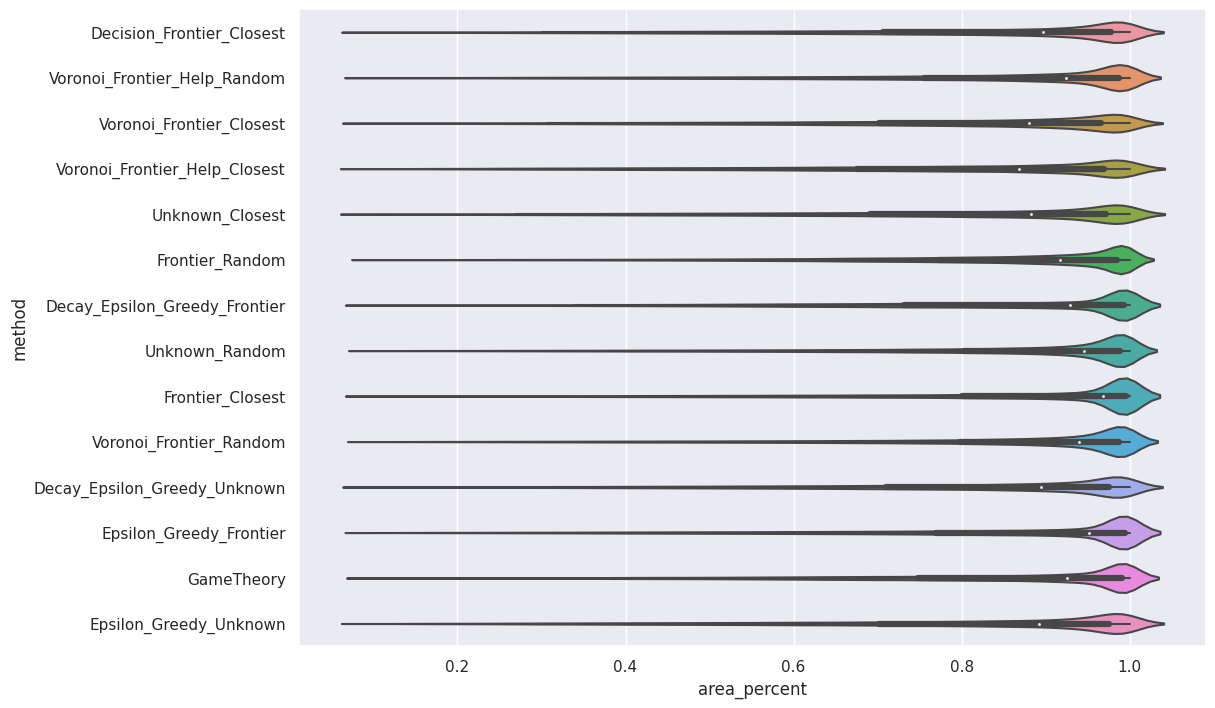

In [13]:
# sns plot of area_percent
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="area_percent", y="method", data=all_df)

<AxesSubplot:xlabel='frame_count', ylabel='area_percent'>

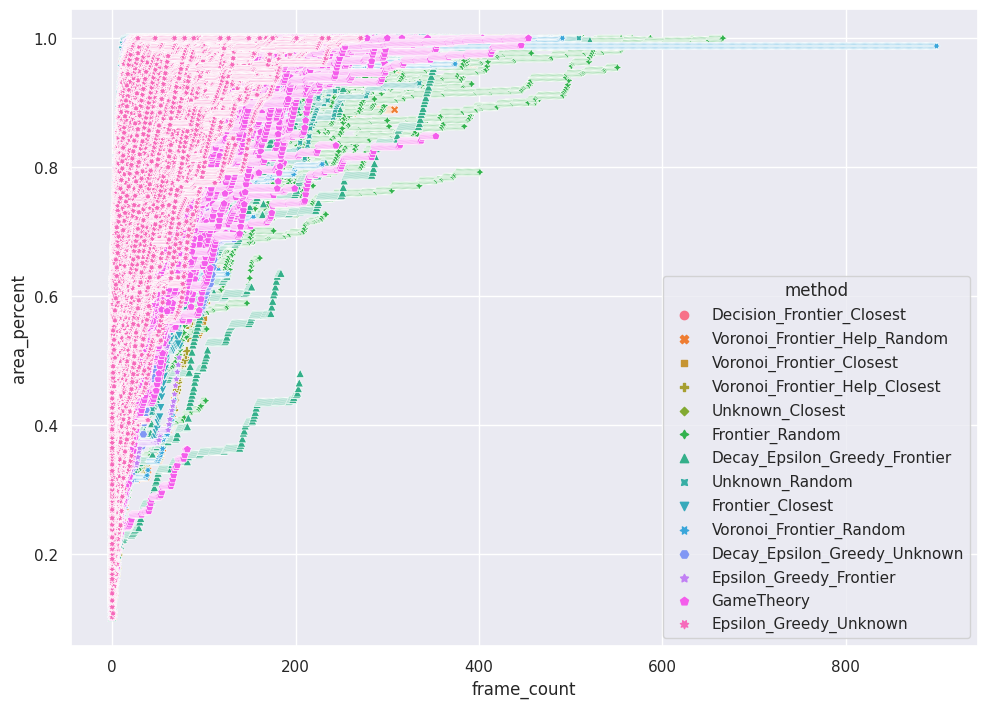

In [14]:
# y axis is the area_percent and the x axis is the frame_count, and the hue is the method
sns.scatterplot(data=all_df, x="frame_count", y="area_percent", hue="method", style="method")

Decay_Epsilon_Greedy_Frontier   522
Decay_Epsilon_Greedy_Unknown   321
Decision_Frontier_Closest   392
Epsilon_Greedy_Frontier   294
Epsilon_Greedy_Unknown   273
Frontier_Closest   339
Frontier_Random   667
GameTheory   455
Unknown_Closest   211
Unknown_Random   510
Voronoi_Frontier_Closest   218
Voronoi_Frontier_Help_Closest   246
Voronoi_Frontier_Help_Random   440
Voronoi_Frontier_Random   900


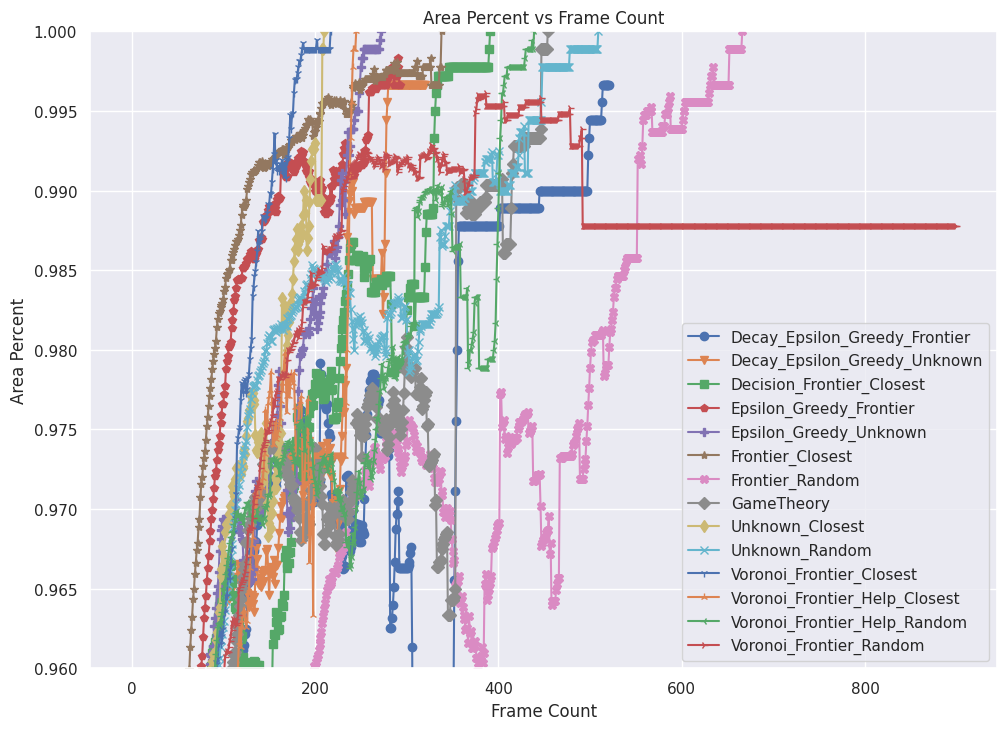

In [15]:
# create a unique marker for each method
markers = ['o', 'v', 's', 'p', 'P', '*', 'X', 'D', 'd', 'x', '1', '2', '3', '4', '8', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']


for i,[method, group] in enumerate(all_df.groupby(['method'])):

    # group by 'frame_count' column
    count_group = group.groupby(['frame_count'])

    # plot mean of 'area_percent' against 'frame_count'
    # plt.plot( count_group['area_percent'].mean(), label=method, marker=markers[i])
    x_data =count_group['area_percent'].mean()
    # x_data[-1]
    print(method," ", len(x_data))
    # uniformy sample 1000 data points
    # x_data =count_group['area_percent'].mean().sample(n=1000, replace=True).sort_values()
    plt.plot( x_data, label=method, marker=markers[i])

plt.legend()

# set y range
plt.ylim(0.96, 1)
# make x axis log scale

# label the x axis
plt.xlabel('Frame Count')
# label the y axis
plt.ylabel('Area Percent')

# set the title
plt.title('Area Percent vs Frame Count')
# save the figure
plt.savefig(f"{root_directory}/data_analysis/plots/area_percent_vs_frame_count.png", dpi=300)

In [16]:
# The average frame_count for each method
all_df.groupby(['method']).max()['frame_count'].sort_values()

method
Unknown_Closest                  210
Voronoi_Frontier_Closest         217
Voronoi_Frontier_Help_Closest    245
Epsilon_Greedy_Unknown           272
Epsilon_Greedy_Frontier          293
Decay_Epsilon_Greedy_Unknown     320
Frontier_Closest                 338
Decision_Frontier_Closest        391
Voronoi_Frontier_Help_Random     439
GameTheory                       454
Unknown_Random                   509
Decay_Epsilon_Greedy_Frontier    521
Frontier_Random                  666
Voronoi_Frontier_Random          899
Name: frame_count, dtype: int64

In [17]:
all_df.groupby(['method'])['delta_time'].max()

method
Decay_Epsilon_Greedy_Frontier     7.69
Decay_Epsilon_Greedy_Unknown      8.60
Decision_Frontier_Closest        13.54
Epsilon_Greedy_Frontier           8.47
Epsilon_Greedy_Unknown            7.91
Frontier_Closest                 11.58
Frontier_Random                  10.50
GameTheory                        6.71
Unknown_Closest                  10.80
Unknown_Random                    8.10
Voronoi_Frontier_Closest          6.86
Voronoi_Frontier_Help_Closest     8.07
Voronoi_Frontier_Help_Random      6.68
Voronoi_Frontier_Random          18.96
Name: delta_time, dtype: float64

In [18]:
all_df.groupby(['method']).agg({'delta_time': np.ptp})

,delta_time
method,
Decay_Epsilon_Greedy_Frontier,7.68
Decay_Epsilon_Greedy_Unknown,8.60
Decision_Frontier_Closest,13.53
Epsilon_Greedy_Frontier,8.47
Epsilon_Greedy_Unknown,7.91
Frontier_Closest,11.58
Frontier_Random,10.50
GameTheory,6.71
Unknown_Closest,10.80


/tmp/ipykernel_2420160/2616091398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_2420160/2616091398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_2420160/2616091398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_2420160/2616091398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_2420160/2616091398.py:7: Futu

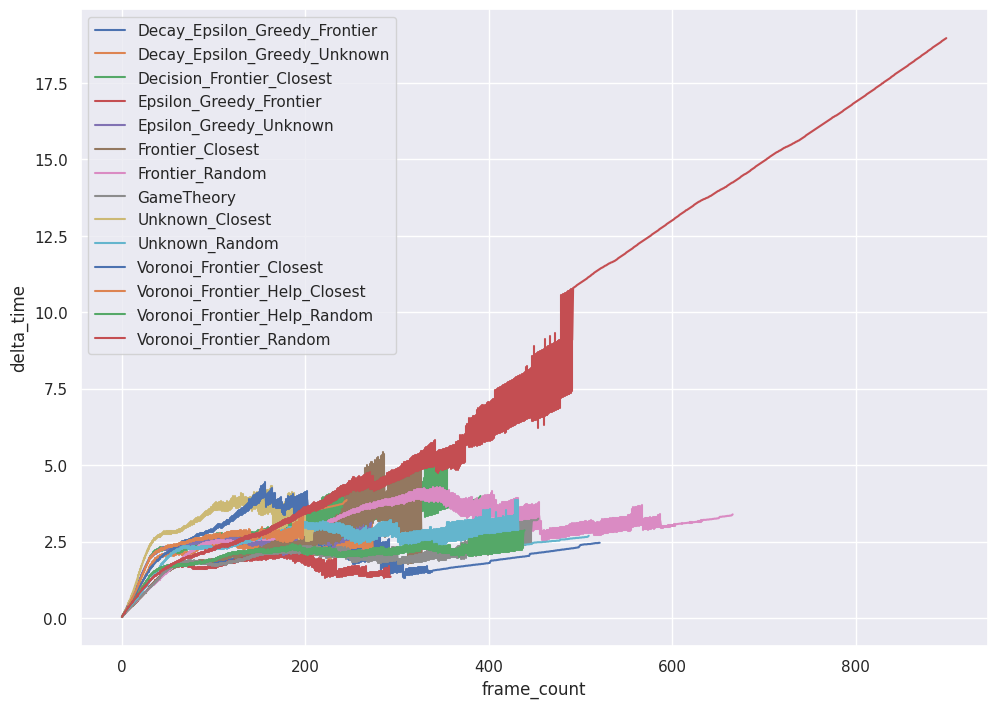

In [19]:
# all_df.groupby(['method'])
for i,[method, group] in enumerate(all_df.groupby(['method'])):
    # group by 'frame_count' column
    # plot mean of 'area_percent' against 'frame_count'
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])
    # plt.plot( np.arange(0, len(count_group['delta_time'])), count_group['delta_time'], label=method, marker=markers[i])
    sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )

plt.legend()



In [20]:
all_df['experiment_ID'].unique()

array([   93,   102,    76, ..., 22676, 22675, 22660])

In [21]:
# all_df.groupby(['method','experiment_ID'])
for i,[method, group] in enumerate(all_df.groupby(['method', 'experiment_ID'])):
    print("i: ", i, "method: ", method, "group: ", group.shape)
    # group by 'frame_count' column
    count_group = group.groupby(['frame_count'])
    # plot mean of 'area_percent' against 'frame_count' 
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])

i:  0 method:  ('Decay_Epsilon_Greedy_Frontier', 9720) group:  (114, 27)
i:  1 method:  ('Decay_Epsilon_Greedy_Frontier', 9721) group:  (211, 27)
i:  2 method:  ('Decay_Epsilon_Greedy_Frontier', 9722) group:  (92, 27)
i:  3 method:  ('Decay_Epsilon_Greedy_Frontier', 9723) group:  (158, 27)
i:  4 method:  ('Decay_Epsilon_Greedy_Frontier', 9724) group:  (139, 27)
i:  5 method:  ('Decay_Epsilon_Greedy_Frontier', 9725) group:  (139, 27)
i:  6 method:  ('Decay_Epsilon_Greedy_Frontier', 9726) group:  (116, 27)
i:  7 method:  ('Decay_Epsilon_Greedy_Frontier', 9727) group:  (119, 27)
i:  8 method:  ('Decay_Epsilon_Greedy_Frontier', 9728) group:  (167, 27)
i:  9 method:  ('Decay_Epsilon_Greedy_Frontier', 9729) group:  (162, 27)
i:  10 method:  ('Decay_Epsilon_Greedy_Frontier', 9730) group:  (153, 27)
i:  11 method:  ('Decay_Epsilon_Greedy_Frontier', 9731) group:  (122, 27)
i:  12 method:  ('Decay_Epsilon_Greedy_Frontier', 9732) group:  (167, 27)
i:  13 method:  ('Decay_Epsilon_Greedy_Frontier',

In [1]:
all_df.describe()

NameError: name 'all_df' is not defined